<a href="https://colab.research.google.com/github/Pavi99sandamini151/Machine_learning/blob/main/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[40,20],
                 [55,30],
                 [70,60],
                 [50,53],
                 [45,40],
                 [62,75],
                 [45,30],
                 [68,80],
                 [80,70],
                 [75,90]])


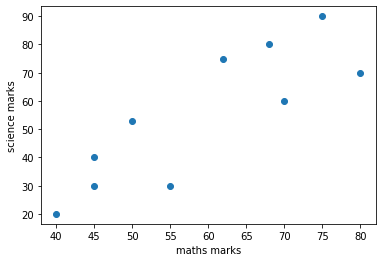

In [3]:
plt.scatter(data[:,0] , data[:,1])
plt.xlabel("maths marks")
plt.ylabel("science marks")
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)

[[-1.43299332 -1.52555297]
 [-0.3016828  -1.08717568]
 [ 0.82962771  0.22795619]
 [-0.67878631 -0.07890791]
 [-1.05588981 -0.64879839]
 [ 0.2262621   0.88552213]
 [-1.05588981 -1.08717568]
 [ 0.67878631  1.10471077]
 [ 1.58383472  0.66633348]
 [ 1.20673122  1.54308806]]


In [5]:
from sklearn.decomposition import PCA


In [6]:
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(n_components=2)

In [8]:
pca.explained_variance_ratio_

array([0.92287222, 0.07712778])

In [9]:
pca_scaled_data = pca.transform(scaled_data)

In [10]:
scaled_data.shape

(10, 2)

In [12]:
pca_scaled_data.shape

(10, 2)

In [13]:
pca_scaled_data = pca.inverse_transform(pca_scaled_data)

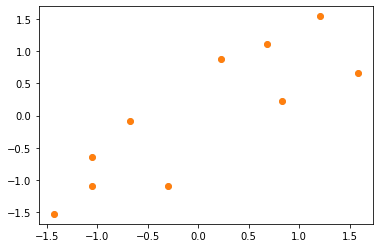

In [16]:
plt.scatter(scaled_data[:,0] , scaled_data[:,1],alpha =0.2)
plt.scatter(pca_scaled_data[:,0] , pca_scaled_data[:,1])

In [17]:
#pca for visualization
from sklearn.datasets import load_digits
digits = load_digits()

In [18]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [20]:
digits.data.shape

(1797, 64)

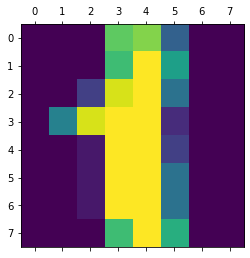

In [21]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[1])
plt.show()

In [22]:
digits.target[1]

1

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components =10)
new_digits = pca.fit_transform(digits.data)

In [24]:
new_digits.shape

(1797, 10)

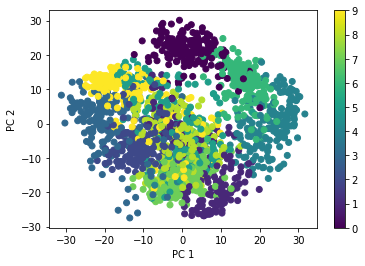

In [27]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:,0] , new_digits[:,1] , c = digits.target)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

In [28]:
#pca for speedup models
from sklearn.datasets import load_digits
import numpy as np

In [29]:
digits = load_digits()

In [30]:
digits.data.shape

(1797, 64)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data = sc.fit_transform(digits.data)

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components =10)
new_data_pca = pca.fit_transform(new_data)

In [41]:
new_data_pca.shape

(1797, 10)

In [42]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(new_data_pca , digits.target , test_size = 0.2 , random_state = 42)

In [43]:
x_train.shape

(1437, 10)

In [44]:
x_test.shape

(360, 10)

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs' , max_iter = 1000)
import time
start = time.time()
model.fit(x_train,y_train)
end = time.time()

print(end - start)

0.16160917282104492


In [46]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test , y_pred)

0.8944444444444445